# Calculate CAA scavenging rates from observations

Dissolved trace metal data from Manuel Colombo, particulate trace metal data from Jingxuan Li.

Date: 2018-07-18

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import stations
from mpl_toolkits.basemap import Basemap, cm
import cmocean
from scipy import interpolate

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
CAA1 = stations.CAA1()
CAA2 = stations.CAA2()
CAA3 = stations.CAA3()
CAA4 = stations.CAA4()
CAA5 = stations.CAA5()
CAA6 = stations.CAA6()
CAA7 = stations.CAA7()
CAA8 = stations.CAA8()
CAA9 = stations.CAA9()
CB1 = stations.CB1()
CB2 = stations.CB2()
CB3 = stations.CB3()
CB4 = stations.CB4()
BB1 = stations.BB1()
BB2 = stations.BB2()
BB3 = stations.BB3()
K1 = stations.K1()
LS2 = stations.LS2()

Station locations:

In [3]:
names = ['CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
         'CB1', 'CB2', 'CB3', 'CB4', 'BB1', 'BB2', 'BB3', 'K1', 'LS2']
lons = [CAA1.lon, CAA2.lon, CAA3.lon, CAA4.lon, CAA5.lon, CAA6.lon, CAA7.lon, CAA8.lon, CAA9.lon, \
        CB1.lon, CB2.lon, CB3.lon, CB4.lon, BB1.lon, BB2.lon, BB3.lon, K1.lon, LS2.lon]
lats = [CAA1.lat, CAA2.lat, CAA3.lat, CAA4.lat, CAA5.lat, CAA6.lat, CAA7.lat, CAA8.lat, CAA9.lat, \
        CB1.lat, CB2.lat, CB3.lat, CB4.lat, BB1.lat, BB2.lat, BB3.lat, K1.lat, LS2.lat]

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


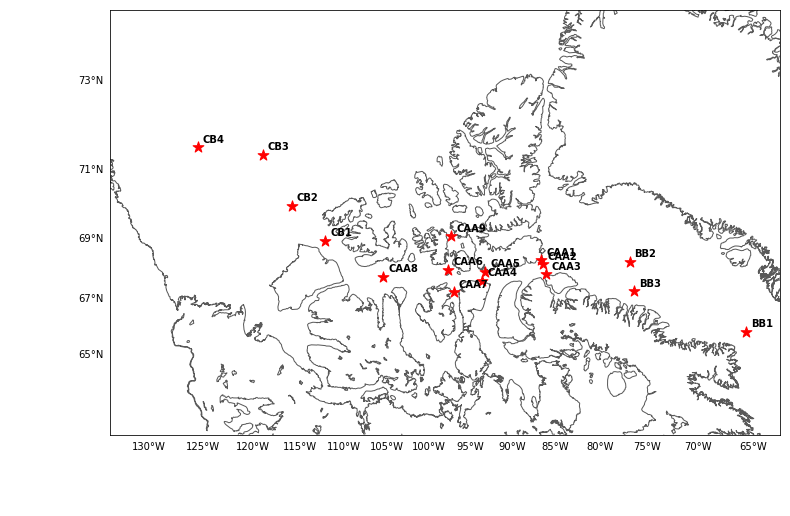

In [17]:
fig,ax = plt.subplots(figsize=(12,8))
proj=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -98, resolution='i', width=3.55e6, height=2.25e6)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=1)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0)

x, y = proj(lons, lats)
 
proj.scatter(x, y, marker='*',s=130,zorder=3, c='r')

for i, (X, Y) in enumerate(zip(x, y), start=1):
    ax.annotate(names[i-1], (X,Y), xytext=(5, 5), textcoords='offset points', fontweight='bold')

### interpolate depths at a particular station

In [18]:
def interp_depth(station):
    d_depth = station.depth
    p_depth = station.pdepth
    dmn = station.dMn
    pmn = station.pMn
    
    min_d = np.amin(d_depth)
    min_p = np.amin(p_depth)
    max_d = np.amax(d_depth)
    max_p = np.amax(p_depth)

    if min_d <= min_p:
        min_depth = min_d
    elif min_d > min_p:
        min_depth = min_p

    if max_d <= max_p:
        max_depth = max_d
    elif max_d > max_p:
        max_depth = max_p    
    
    stepsize = int((max_depth-min_depth)/30)
    depths = np.arange(min_depth, max_depth+stepsize, stepsize)  
    
    f1 = interpolate.interp1d(d_depth, dmn, fill_value='extrapolate')
    interp_dmn = f1(depths)

    f2 = interpolate.interp1d(p_depth, pmn, fill_value='extrapolate')
    interp_pmn = f2(depths)    

    return depths, interp_dmn, interp_pmn

In [19]:
CB3_depths, CB3_dmn, CB3_pmn = interp_depth(CB3)
CAA1_depths, CAA1_dmn, CAA1_pmn = interp_depth(CAA1)
CAA2_depths, CAA2_dmn, CAA2_pmn = interp_depth(CAA2)
CAA3_depths, CAA3_dmn, CAA3_pmn = interp_depth(CAA3)
CAA4_depths, CAA4_dmn, CAA4_pmn = interp_depth(CAA4)
CAA5_depths, CAA5_dmn, CAA5_pmn = interp_depth(CAA5)
CAA6_depths, CAA6_dmn, CAA6_pmn = interp_depth(CAA6)
CAA7_depths, CAA7_dmn, CAA7_pmn = interp_depth(CAA7)
CAA8_depths, CAA8_dmn, CAA8_pmn = interp_depth(CAA8)
CAA9_depths, CAA9_dmn, CAA9_pmn = interp_depth(CAA9)

#### Convert units for ratio comparison: pmol/L --> nM

In [20]:
# pmol/L ---> nM
CB3_pmn = CB3_pmn*10**(-3)
CAA1_pmn = CAA1_pmn*10**(-3)
CAA2_pmn = CAA2_pmn*10**(-3)
CAA3_pmn = CAA3_pmn*10**(-3)
CAA4_pmn = CAA4_pmn*10**(-3)
CAA5_pmn = CAA5_pmn*10**(-3)
CAA6_pmn = CAA6_pmn*10**(-3)
CAA7_pmn = CAA7_pmn*10**(-3)
CAA8_pmn = CAA8_pmn*10**(-3)
CAA9_pmn = CAA9_pmn*10**(-3)

## Calculating scavenging rates:

$x_{d}$ - dissolved trace metal concentration <br>
$x_{p}$ - particulate trace metal concentration <br>
$k_{a}$ - adsorption rate constant <br>
$k_{d}$ - desorption rate constant <br>
$s$ - sinking rate

$$ \frac{\partial x_{p}}{\partial t} = k_{a} x_{p} - k_{d} x_{d} - s \frac{\partial x_{p}}{\partial z}$$

$$ \frac{\partial x_{d}}{\partial t} = -k_{a} x_{p} + k_{d} x_{d}$$

Assuming steady-state:
$$ x_{p} = \frac{k_{d}}{k_{a}} x_{d}$$

## Ratios:

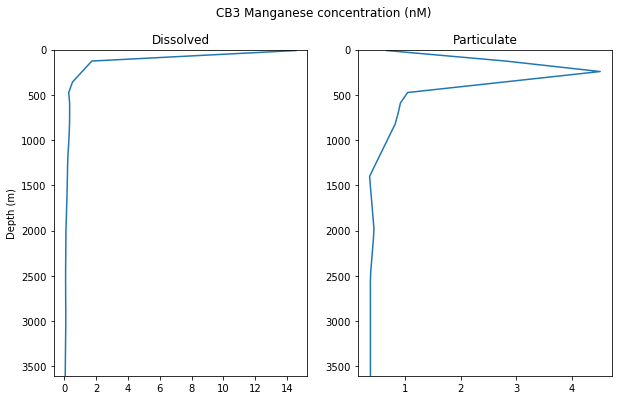

In [26]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('CB3 Manganese concentration (nM)')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))

ax1.invert_yaxis()
ax1.set_title('Dissolved')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(CB3_depths), 0])

ax2.invert_yaxis()
ax2.set_title('Particulate')
ax2.set_ylim([max(CB3_depths), 0])

ax1.plot(CB3_dmn, CB3_depths, label='dissolved')
ax2.plot(CB3_pmn, CB3_depths, label='particulate')

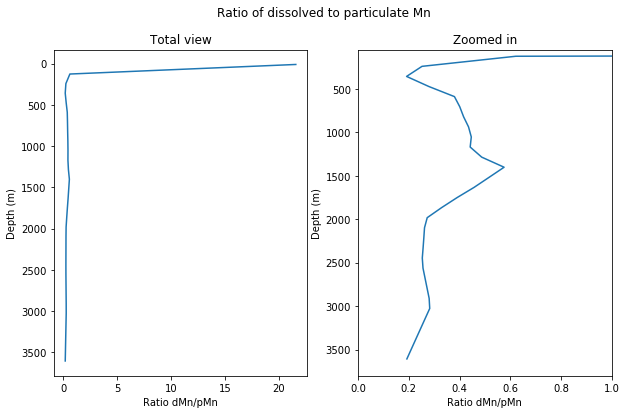

In [28]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))

fig.suptitle('Ratio of dissolved to particulate Mn')

ax1.invert_yaxis()
ax1.set_title('Total view')
ax1.set_xlabel('Ratio dMn/pMn')
ax1.set_ylabel('Depth (m)')
ax1.plot([CB3_dmn[i] / CB3_pmn[i] for i in range(0,len(CB3_dmn))],CB3_depths)

ax2.invert_yaxis()
ax2.set_title('Zoomed in')
ax2.set_xlabel('Ratio dMn/pMn')
ax2.set_ylabel('Depth (m)')
ax2.set_xlim(0, 1)
ax2.set_ylim(3800, 50)
ax2.plot([CB3_dmn[i] / CB3_pmn[i] for i in range(0,len(CB3_dmn))],CB3_depths)

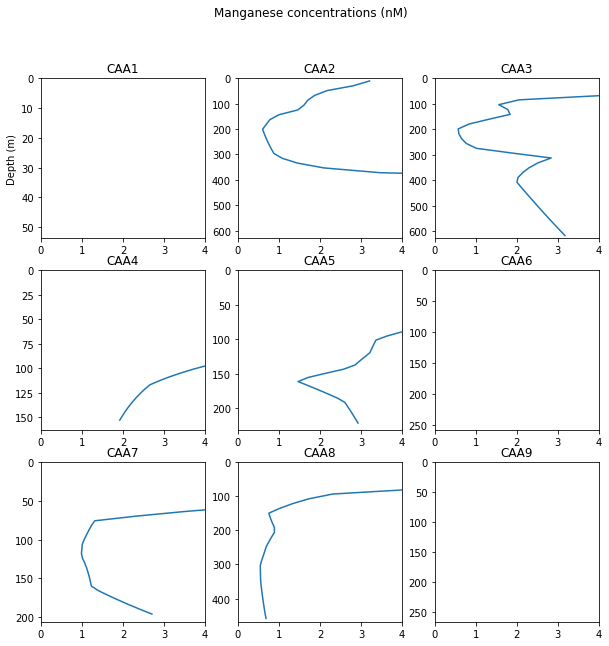

In [29]:
# Setup figure:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Manganese concentrations (nM)')
ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (0, 2))
ax4 = plt.subplot2grid((3, 3), (1, 0))
ax5 = plt.subplot2grid((3, 3), (1, 1))
ax6 = plt.subplot2grid((3, 3), (1, 2))
ax7 = plt.subplot2grid((3, 3), (2, 0))
ax8 = plt.subplot2grid((3, 3), (2, 1))
ax9 = plt.subplot2grid((3, 3), (2, 2))

ax1.invert_yaxis()
ax1.set_title('CAA1')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(CAA1_depths)+10, 0])
ax1.set_xlim(0, 4)

ax2.invert_yaxis()
ax2.set_title('CAA2')
ax2.set_ylim([max(CAA2_depths)+10, 0])
ax2.set_xlim(0, 4)

ax3.invert_yaxis()
ax3.set_title('CAA3')
ax3.set_ylim([max(CAA3_depths)+10, 0])
ax3.set_xlim(0, 4)

ax4.invert_yaxis()
ax4.set_title('CAA4')
ax4.set_ylim([max(CAA4_depths)+10, 0])
ax4.set_xlim(0, 4)

ax5.invert_yaxis()
ax5.set_title('CAA5')
ax5.set_ylim([max(CAA5_depths)+10, 0])
ax5.set_xlim(0, 4)

ax6.invert_yaxis()
ax6.set_title('CAA6')
ax6.set_ylim([max(CAA6_depths)+10, 0])
ax6.set_xlim(0, 4)

ax7.invert_yaxis()
ax7.set_title('CAA7')
ax7.set_ylim([max(CAA7_depths)+10, 0])
ax7.set_xlim(0, 4)

ax8.invert_yaxis()
ax8.set_title('CAA8')
ax8.set_ylim([max(CAA8_depths)+10, 0])
ax8.set_xlim(0, 4)

ax9.invert_yaxis()
ax9.set_title('CAA9')
ax9.set_ylim([max(CAA9_depths)+10, 0])
ax9.set_xlim(0, 4)

ax1.plot([CAA1_dmn[i] / CAA1_pmn[i] for i in range(0,len(CAA1_dmn))],CAA1_depths)
ax2.plot([CAA2_dmn[i] / CAA2_pmn[i] for i in range(0,len(CAA2_dmn))],CAA2_depths)
ax3.plot([CAA3_dmn[i] / CAA3_pmn[i] for i in range(0,len(CAA3_dmn))],CAA3_depths)
ax4.plot([CAA4_dmn[i] / CAA4_pmn[i] for i in range(0,len(CAA4_dmn))],CAA4_depths)
ax5.plot([CAA5_dmn[i] / CAA5_pmn[i] for i in range(0,len(CAA5_dmn))],CAA5_depths)
ax6.plot([CAA6_dmn[i] / CAA6_pmn[i] for i in range(0,len(CAA6_dmn))],CAA6_depths)
ax7.plot([CAA7_dmn[i] / CAA7_pmn[i] for i in range(0,len(CAA7_dmn))],CAA7_depths)
ax8.plot([CAA8_dmn[i] / CAA8_pmn[i] for i in range(0,len(CAA8_dmn))],CAA8_depths)
ax9.plot([CAA9_dmn[i] / CAA9_pmn[i] for i in range(0,len(CAA9_dmn))],CAA9_depths)

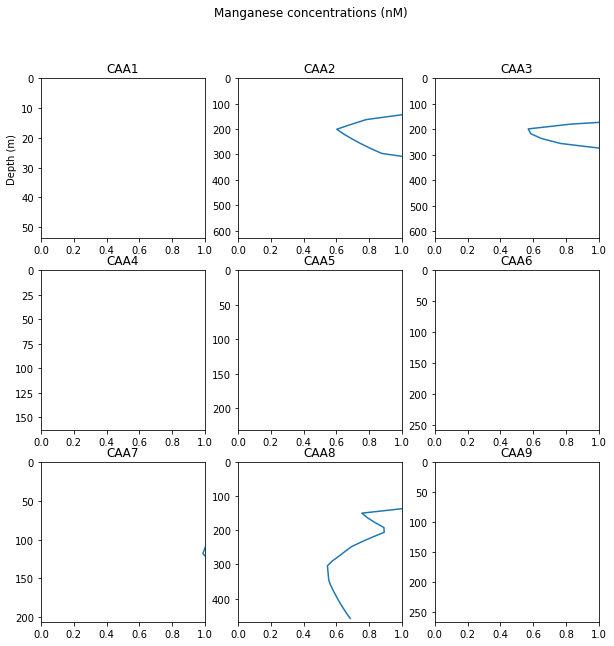

In [30]:
# Setup figure:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Manganese concentrations (nM)')
ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (0, 2))
ax4 = plt.subplot2grid((3, 3), (1, 0))
ax5 = plt.subplot2grid((3, 3), (1, 1))
ax6 = plt.subplot2grid((3, 3), (1, 2))
ax7 = plt.subplot2grid((3, 3), (2, 0))
ax8 = plt.subplot2grid((3, 3), (2, 1))
ax9 = plt.subplot2grid((3, 3), (2, 2))

ax1.invert_yaxis()
ax1.set_title('CAA1')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(CAA1_depths)+10, 0])
ax1.set_xlim(0, 1)

ax2.invert_yaxis()
ax2.set_title('CAA2')
ax2.set_ylim([max(CAA2_depths)+10, 0])
ax2.set_xlim(0, 1)

ax3.invert_yaxis()
ax3.set_title('CAA3')
ax3.set_ylim([max(CAA3_depths)+10, 0])
ax3.set_xlim(0, 1)

ax4.invert_yaxis()
ax4.set_title('CAA4')
ax4.set_ylim([max(CAA4_depths)+10, 0])
ax4.set_xlim(0, 1)

ax5.invert_yaxis()
ax5.set_title('CAA5')
ax5.set_ylim([max(CAA5_depths)+10, 0])
ax5.set_xlim(0, 1)

ax6.invert_yaxis()
ax6.set_title('CAA6')
ax6.set_ylim([max(CAA6_depths)+10, 0])
ax6.set_xlim(0, 1)

ax7.invert_yaxis()
ax7.set_title('CAA7')
ax7.set_ylim([max(CAA7_depths)+10, 0])
ax7.set_xlim(0, 1)

ax8.invert_yaxis()
ax8.set_title('CAA8')
ax8.set_ylim([max(CAA8_depths)+10, 0])
ax8.set_xlim(0, 1)

ax9.invert_yaxis()
ax9.set_title('CAA9')
ax9.set_ylim([max(CAA9_depths)+10, 0])
ax9.set_xlim(0, 1)

ax1.plot([CAA1_dmn[i] / CAA1_pmn[i] for i in range(0,len(CAA1_dmn))],CAA1_depths)
ax2.plot([CAA2_dmn[i] / CAA2_pmn[i] for i in range(0,len(CAA2_dmn))],CAA2_depths)
ax3.plot([CAA3_dmn[i] / CAA3_pmn[i] for i in range(0,len(CAA3_dmn))],CAA3_depths)
ax4.plot([CAA4_dmn[i] / CAA4_pmn[i] for i in range(0,len(CAA4_dmn))],CAA4_depths)
ax5.plot([CAA5_dmn[i] / CAA5_pmn[i] for i in range(0,len(CAA5_dmn))],CAA5_depths)
ax6.plot([CAA6_dmn[i] / CAA6_pmn[i] for i in range(0,len(CAA6_dmn))],CAA6_depths)
ax7.plot([CAA7_dmn[i] / CAA7_pmn[i] for i in range(0,len(CAA7_dmn))],CAA7_depths)
ax8.plot([CAA8_dmn[i] / CAA8_pmn[i] for i in range(0,len(CAA8_dmn))],CAA8_depths)
ax9.plot([CAA9_dmn[i] / CAA9_pmn[i] for i in range(0,len(CAA9_dmn))],CAA9_depths)